In [2]:
import os
new_directory = '/home/franciscoperez/Documents/GitHub/CNN-PELSVAE2/cnn-pels-vae/'
os.chdir(new_directory)

import matplotlib.pyplot as plt
import numpy as np
import yaml
import pandas as pd
import src.utils as utils

In [38]:
def plot_single_lc(lc_real, cls='RR Lyrae', ID='EXAMPLE', errorbar_color='blue'):
    """
    Creates a single light curve plot with real data, displaying photometric errors in a specified color.

    Parameters
    ----------
    lc_real : numpy array or DataFrame
        Real light curve data to be plotted. Expected to have 'time', 'magnitude', and 'magnitude_error' columns.
    cls : string, optional
        Label to be displayed as legend.
    ID : string, optional
        Identifier for the plot, used in title and filename.
    errorbar_color : string, optional
        Color for the error bars.

    Returns
    -------
    None
    """
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # Plotting the light curve with error bars in specified color
    ax.errorbar(lc_real['time'], lc_real['magnitude'], yerr=lc_real['error'],
                fmt='.', c='gray', ecolor=errorbar_color, alpha=0.5, label=cls)

    ax.set_xlabel('Time (MJD)', fontsize=15)  # Modified Julian Date for time axis
    ax.set_ylabel('Magnitude', fontsize=15)
    
    ax.invert_yaxis()  # Magnitude is usually plotted in reverse
    plt.title(ID)
    plt.tight_layout()

    plt.savefig(f'{ID}_lc.png')  # Save the figure before showing it
    plt.show()



def plot_single_phased_lc(lc_real, cls='RR Lyrae', ID='EXAMPLE', period=1):
    """
    Creates a single light curve plot, phased over two cycles, with real data,
    starting from the phase of the maximum magnitude value.

    Parameters
    ----------
    lc_real : numpy array or DataFrame
        Real light curve data to be plotted.
    cls : string, optional
        Label to be displayed as legend.
    ID : string, optional
        Identifier for the plot, used in title and filename.
    period : float, optional
        Period of the light curve, used to calculate the phase.

    Returns
    -------
    None
    """
    fig, ax = plt.subplots(figsize=(7, 4))

    # Identify the time of maximum magnitude
    max_mag_time = lc_real.loc[lc_real['magnitude'].idxmax(), 'time']

    # Calculate the phase, ensuring it starts from the maximum magnitude
    phased_time = ((lc_real['time'] - max_mag_time) / period) % 1
    lc_real['phased_time'] = phased_time

    # Sort by phased time for plotting continuity
    lc_real_sorted = lc_real.sort_values('phased_time')

    # Extend the phase and magnitude for two cycles
    phased_time_extended = np.concatenate([lc_real_sorted['phased_time'], 
                                           lc_real_sorted['phased_time'] + 1])
    
    magnitude_extended = np.concatenate([lc_real_sorted['magnitude'], 
                                         lc_real_sorted['magnitude']])
    
    ax.errorbar(phased_time_extended, magnitude_extended, fmt='.', c='gray', 
                alpha=0.5, label=cls)
    
    ax.set_xlabel('Phase', fontsize=15)
    ax.set_ylabel('Magnitude', fontsize=15)
    
    ax.invert_yaxis()
    ax.legend(loc='lower left')
    ax.set_title(ID)
    plt.tight_layout()

    plt.savefig(f'{ID}_lc_phased.png')  # Save the figure
    plt.show()



In [4]:
with open('src/configuration/paths.yaml', 'r') as file:
    YAML_FILE = yaml.safe_load(file)

PATHS =YAML_FILE['paths']
PATH_LIGHT_CURVES_OGLE = PATHS['PATH_LIGHT_CURVES_OGLE']
PATH_FEATURES_TRAIN = PATHS['PATH_FEATURES_TRAIN']
path_train = PATH_FEATURES_TRAIN
lc_train = pd.read_table(PATH_FEATURES_TRAIN, sep= ',')

new_cols = lc_train.ID.str.split("-", n = 3, expand = True)
new_cols.columns = ['survey', 'field', 'class', 'number']

# concatenate the new columns with the original DataFrame
lc_train = pd.concat([new_cols, lc_train], axis=1)



Insert class you desire visualize

In [5]:
desired_class = 'DSCT'

In [6]:
lc = lc_train[(lc_train['class']==desired_class)].sample(1)['ID'].values[0]

lc_id_to_title = lc.replace('.dat', '')

lc, lc_id_to_title

('OGLE-LMC-DSCT-1414.dat', 'OGLE-LMC-DSCT-1414')

In [39]:
lc, lc_id_to_title = ('OGLE-BLG-RRLYR-09993.dat', 'OGLE-BLG-RRLYR-09993')

In [40]:
path_lc = (PATH_LIGHT_CURVES_OGLE+lc.split('-')[1].lower()+'/'+lc.split('-')[2].lower()+'/phot/I/'+lc)
p = lc_train[lc_train.ID==lc].PeriodLS.values[0]
print(p)
lcu = pd.read_table(path_lc, sep=" ", names=['time', 'magnitude', 'error'])
lcu

0.466014


,time,magnitude,error
0,2117.77370,16.826,0.009
1,2128.73104,17.110,0.011
2,2131.59502,17.264,0.010
3,2135.61787,17.045,0.008
4,2140.60017,16.791,0.009
...,...,...,...
109,2903.56317,17.086,0.007
110,2916.55647,16.968,0.009
111,2925.58349,17.255,0.013
112,2937.54463,16.980,0.012


In [41]:
lc_id_to_title

'OGLE-BLG-RRLYR-09993'

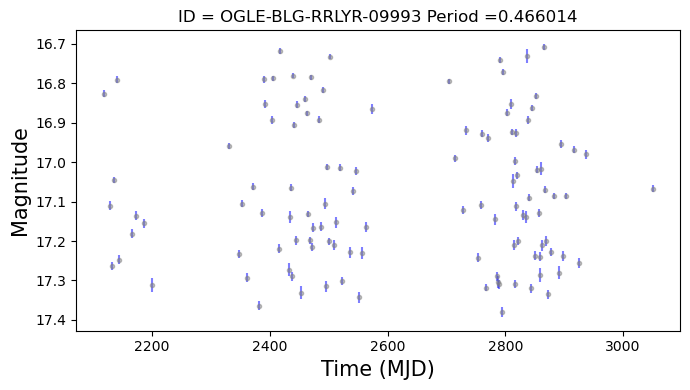

In [42]:
plot_single_lc(lcu, cls=desired_class, ID='ID = '+lc_id_to_title+' Period ='+str(p))

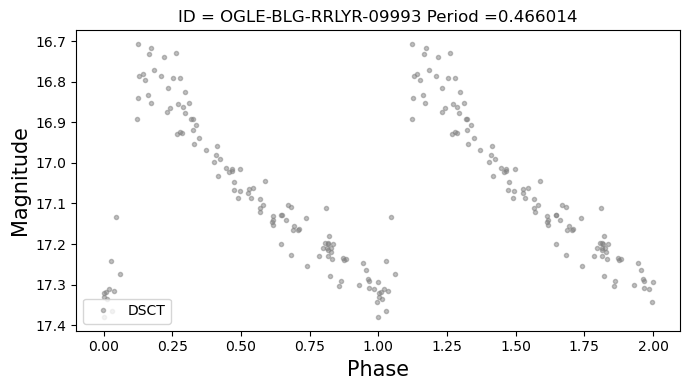

In [43]:
plot_single_phased_lc(lcu, cls=desired_class, ID='ID = '+lc_id_to_title+' Period ='+str(p), period=p)